In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the cleaned and prepared dataset
df = pd.read_csv('/workspaces/Data-Analyst-Project-Portfolio/Customer_Churn_Analysis/data/Processed/cleaned_telco_data.csv')

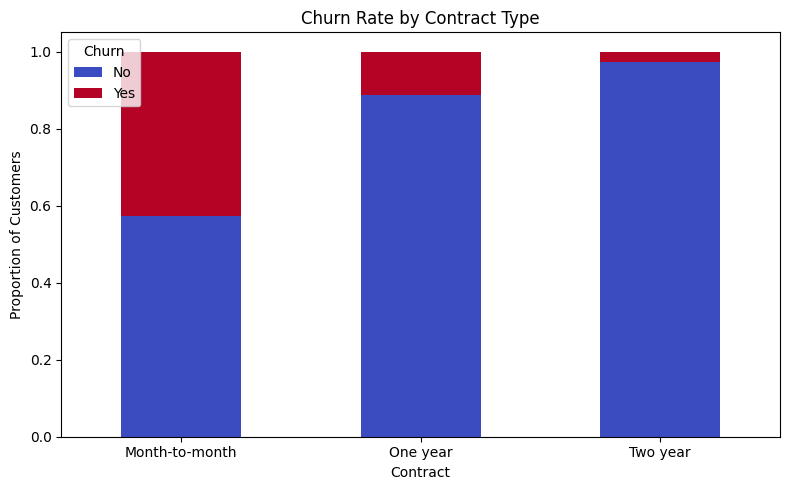

In [3]:
# Churn rate by contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()